# Covid-19 Analysis

<h4>Setup and read dataset file. Souce in Kaggle, "imdevskp/corona-virus-report"
<h5>    
    Plotly is required. You'll need a username and corresponding api_key to connect to it and generate the plots online.

In [476]:
import chart_studio, zipfile, math
import numpy as np
import pandas as pd
import chart_studio.plotly as py
import plotly.graph_objects as go
import plotly.io as pio
from plotly.subplots import make_subplots

In [477]:
initable = pd.read_table('covid-19.ini', delimiter=',', dtype={'Key':str, 'Value':str})
chart_studio.tools.set_credentials_file(username=initable.iloc[0,1], api_key=initable.iloc[1,1])
z = zipfile.ZipFile(initable.iloc[2,1])
dataset = pd.read_csv(z.open(initable.iloc[3,1]))
# drop non-interesting categories
del dataset["Lat"]
del dataset["Long"]
dataset.rename({"Province/State": "Province"}, axis=1, inplace=True)
dataset.rename({"Country/Region": "Country"}, axis=1, inplace=True)
series = []

In [478]:
interestingCountries=["France","Brazil", "US", "Italy", "Spain", "Japan", "Korea", "China"]
highlightedCountries=['Brazil','US', 'Italy', "China"]

In [479]:
# drop non-interesting Countries
dataset=dataset[dataset.Country.isin(interestingCountries)]
dataset

,Province,Country,Date,Confirmed,Deaths,Recovered
28,NaN,Brazil,1/22/20,0,0,0
49,Anhui,China,1/22/20,1,0,0
50,Beijing,China,1/22/20,14,0,0
51,Chongqing,China,1/22/20,6,0,0
52,Fujian,China,1/22/20,1,0,0
...,...,...,...,...,...,...
19712,NaN,Italy,4/6/20,132547,16523,22837
19714,NaN,Japan,4/6/20,3654,85,575
19776,NaN,Spain,4/6/20,136675,13341,40437
19800,NaN,US,4/6/20,366614,10783,19581


<h5>Find 'Confirmed' cases

In [480]:
confirmedresultset=dataset.groupby(['Country','Date']).agg({'Confirmed': sum})
confirmedresultset.reset_index(level=['Date'], inplace=True) #put Date back to column
confirmedresultset['Date']=pd.to_datetime(confirmedresultset['Date'], format='%m/%d/%y') #convert column to type Date
confirmedresultset=confirmedresultset.sort_values(['Country','Date'], ascending=True) #sort by Country then Date
confirmedresultset['DailyChange']=confirmedresultset['Confirmed'].diff()
confirmedresultset.loc[confirmedresultset['DailyChange']<0,"DailyChange"]=np.nan
confirmedresultset

,Date,Confirmed,DailyChange
Country,,,
Brazil,2020-01-22,0,NaN
Brazil,2020-01-23,0,0.0
Brazil,2020-01-24,0,0.0
Brazil,2020-01-25,0,0.0
Brazil,2020-01-26,0,0.0
...,...,...,...
US,2020-04-02,243453,30081.0
US,2020-04-03,275586,32133.0
US,2020-04-04,308850,33264.0


<h5>Find 'Deaths' cases

In [481]:
deathsresultset=dataset.groupby(['Country','Date']).agg({'Deaths': sum})
deathsresultset.reset_index(level=['Date'], inplace=True) #put Date back to column
deathsresultset['Date']=pd.to_datetime(deathsresultset['Date'], format='%m/%d/%y') #convert column to type Date
deathsresultset=deathsresultset.sort_values(['Country','Date'], ascending=True) #sort by Country then Date
deathsresultset['DailyChange']=deathsresultset['Deaths'].diff()
deathsresultset.loc[deathsresultset['DailyChange']<0,"DailyChange"]=np.nan
deathsresultset

,Date,Deaths,DailyChange
Country,,,
Brazil,2020-01-22,0,NaN
Brazil,2020-01-23,0,0.0
Brazil,2020-01-24,0,0.0
Brazil,2020-01-25,0,0.0
Brazil,2020-01-26,0,0.0
...,...,...,...
US,2020-04-02,5926,1169.0
US,2020-04-03,7087,1161.0
US,2020-04-04,8407,1320.0


<h5>Find 'Recovered' cases

In [482]:
recoveredresultset=dataset.groupby(['Country','Date']).agg({'Recovered': sum})
recoveredresultset.reset_index(level=['Date'], inplace=True) #put Date back to column
recoveredresultset['Date']=pd.to_datetime(recoveredresultset['Date'], format='%m/%d/%y') #convert column to type Date
recoveredresultset=recoveredresultset.sort_values(['Country','Date'], ascending=True) #sort by Country then Date
recoveredresultset['DailyChange']=recoveredresultset['Recovered'].diff()
recoveredresultset.loc[recoveredresultset['DailyChange']<0,"DailyChange"]=np.nan
recoveredresultset

,Date,Recovered,DailyChange
Country,,,
Brazil,2020-01-22,0,NaN
Brazil,2020-01-23,0,0.0
Brazil,2020-01-24,0,0.0
Brazil,2020-01-25,0,0.0
Brazil,2020-01-26,0,0.0
...,...,...,...
US,2020-04-02,9001,527.0
US,2020-04-03,9707,706.0
US,2020-04-04,14652,4945.0


<h4>Confirmed cases graphic

In [483]:
series = []
for country in interestingCountries: 
    if country in highlightedCountries:
        focus = 1
    else:
        focus = 0.3
    series.append(
        go.Scatter(
            x=confirmedresultset[confirmedresultset.index == country].Date, 
            y=confirmedresultset[confirmedresultset.index == country].Confirmed, 
            name=country+" Confirmed", 
            mode="markers+lines", opacity=focus,
            marker={"symbol":"circle", "size": 5},
            )
        )

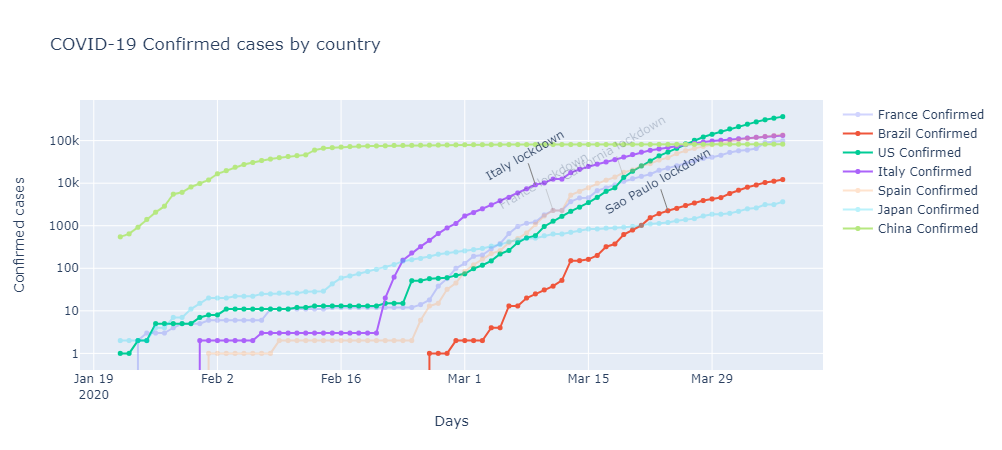

In [484]:
figcc = go.Figure(series)
figcc.update_layout(title_text='COVID-19 Confirmed cases by country')
figcc.update_xaxes(title_text='Days')
figcc.update_yaxes(title_text='Confirmed cases', type='log')
figcc.add_annotation(
        x='2020-03-24',
        y=math.log(2247,10), xref="x", yref="y",
        text="Sao Paulo lockdown", textangle = 330, showarrow=True, arrowcolor='grey')
figcc.add_annotation(
        x='2020-03-09',
        y=math.log(9172,10), xref="x", yref="y",
        text="Italy lockdown", textangle = 330, showarrow=True, arrowcolor='grey')
figcc.add_annotation(
        x='2020-03-11',
        y=math.log(2293,10), xref="x", yref="y",
        text="France lockdown", textangle = 330, showarrow=True, arrowcolor='grey', opacity=0.3)
figcc.add_annotation(
        x='2020-03-19',
        y=math.log(13677,10), xref="x", yref="y",
        text="California lockdown", textangle = 330, showarrow=True, arrowcolor='grey', opacity=0.3)
#py.iplot(figcc, file='covid-19.html', auto_open=False)
figcc.show()

<h4>New Confirmed cases per day

In [485]:
series = []
for country in interestingCountries: 
    if country in highlightedCountries:
        focus = 1
    else:
        focus = 0.3
    series.append(
        go.Scatter(
            x=confirmedresultset[confirmedresultset.index == country].Date, 
            y=confirmedresultset[confirmedresultset.index == country].DailyChange, 
            name=country+" new confirmed", 
            mode="markers", opacity=focus,
            marker={"symbol":"circle", "size": 5},
            )
        )

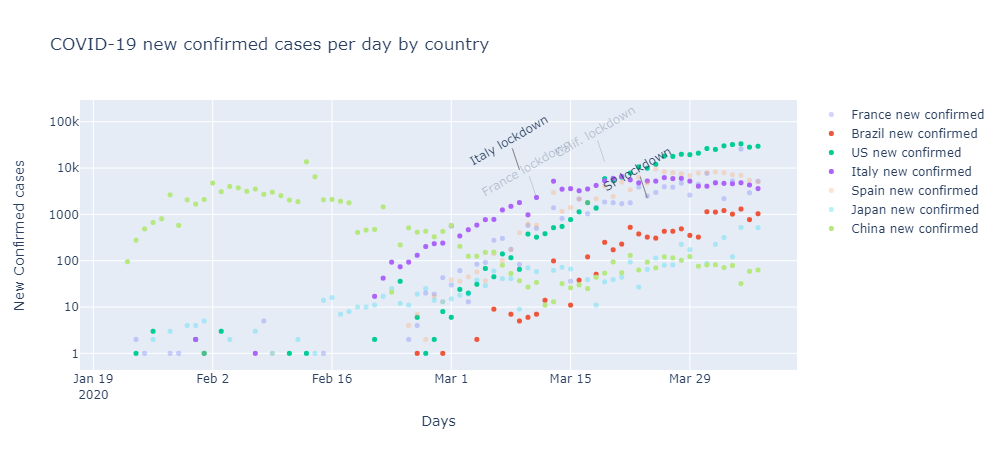

In [486]:
fignc = go.Figure(series)
fignc.update_layout(title_text='COVID-19 new confirmed cases per day by country')
fignc.update_xaxes(title_text='Days')
fignc.update_yaxes(title_text='New Confirmed cases', type='log')
fignc.add_annotation(
        x='2020-03-24',
        y=math.log(2247,10), xref="x", yref="y",
        text="SP lockdown", textangle = 330, showarrow=True, arrowcolor='grey')
fignc.add_annotation(
        x='2020-03-09',
        y=math.log(9172,10), xref="x", yref="y",
        text="Italy lockdown", textangle = 330, showarrow=True, arrowcolor='grey')
fignc.add_annotation(
        x='2020-03-11',
        y=math.log(2293,10), xref="x", yref="y",
        text="France lockdown", textangle = 330, showarrow=True, arrowcolor='grey', opacity=0.3)
fignc.add_annotation(
        x='2020-03-19',
        y=math.log(13677,10), xref="x", yref="y",
        text="Calif. lockdown", textangle = 330, showarrow=True, arrowcolor='grey', opacity=0.3)
#py.iplot(fignc, file='covid-19.html', auto_open=False)
fignc.show()

<h4>Death cases

In [487]:
series = []
for country in interestingCountries: 
    if country in highlightedCountries:
        focus = 1
    else:
        focus = 0.3
    series.append(
        go.Scatter(
            x=deathsresultset[deathsresultset.index == country].Date, 
            y=deathsresultset[deathsresultset.index == country].Deaths, 
            name=country+" Deaths",
            mode="markers+lines", opacity=focus,
            marker={"symbol":"circle", "size": 5},
        )
    )

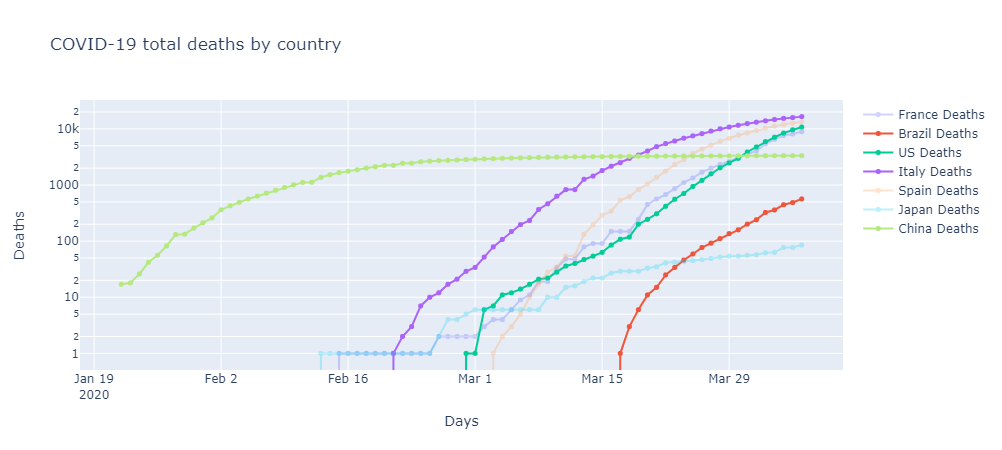

In [488]:
figdc = go.Figure(series)
figdc.update_layout(title_text='COVID-19 total deaths by country')
figdc.update_xaxes(title_text='Days')
figdc.update_yaxes(title_text='Deaths', type='log')
#py.iplot(figdc, file='covid-19.html', auto_open=False)
figdc.show()

<h5> New Deaths per day

In [489]:
series = []
for country in interestingCountries: 
    if country in highlightedCountries:
        focus = 1
    else:
        focus = 0.3
    series.append(
        go.Scatter(
            x=deathsresultset[deathsresultset.index == country].Date, 
            y=deathsresultset[deathsresultset.index == country].DailyChange, 
            name=country+" new deaths", 
            mode="markers", opacity=focus,
            marker={"symbol":"circle", "size": 5},
            )
        )

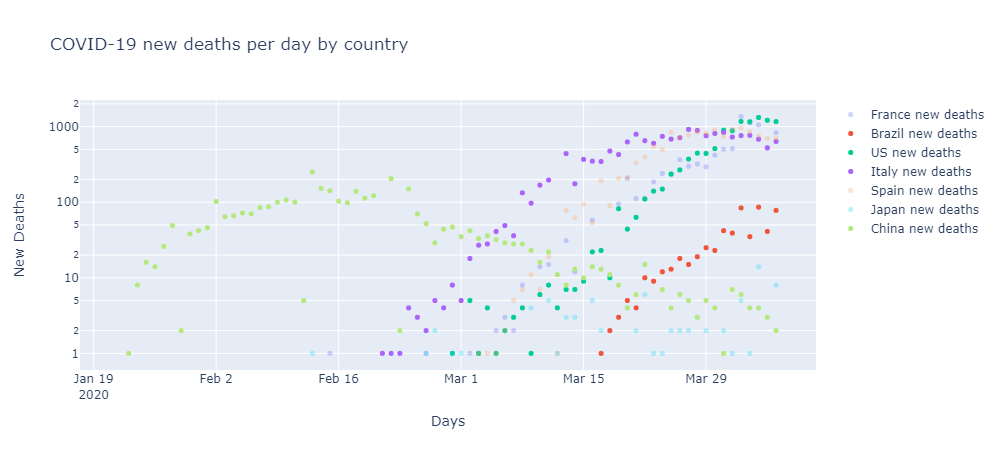

In [490]:
fignd = go.Figure(series)
fignd.update_layout(title_text='COVID-19 new deaths per day by country')
fignd.update_xaxes(title_text='Days')
fignd.update_yaxes(title_text='New Deaths', type='log')
#py.iplot(fignd, file='covid-19.html', auto_open=False)
fignd.show()

<h4>Recovered cases

In [491]:
series = []
for country in interestingCountries: 
    if country in highlightedCountries:
        focus = 1
    else:
        focus = 0.3
    series.append(
        go.Scatter(
            x=recoveredresultset[recoveredresultset.index == country].Date, 
            y=recoveredresultset[recoveredresultset.index == country].Recovered, 
            name=country+" Recovered",
            mode="markers+lines", opacity=focus,
            marker={"symbol":"circle", "size": 5},
        )
    )

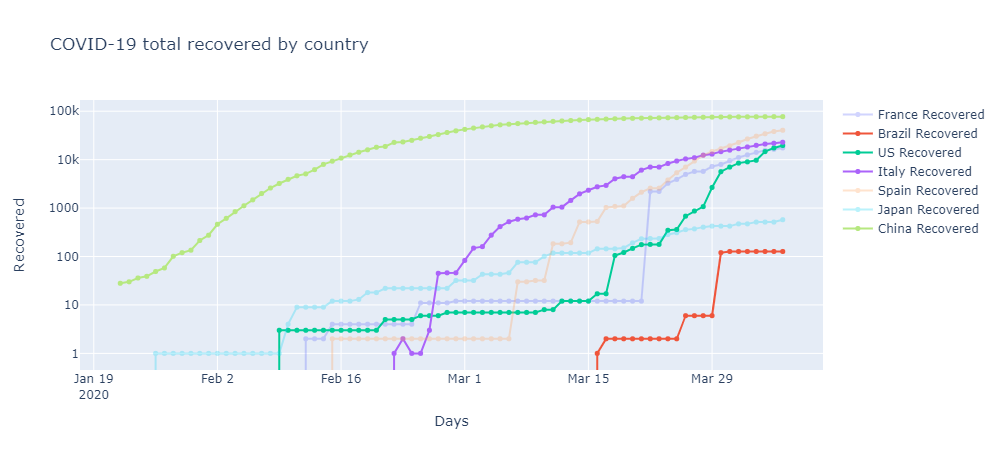

In [492]:
fig = go.Figure(series)
fig.update_layout(title_text='COVID-19 total recovered by country')
fig.update_xaxes(title_text='Days')
fig.update_yaxes(title_text='Recovered', type='log')
#py.iplot(fig, file='covid-19.html', auto_open=False)
fig.show()

<h5>New Recovered cases per day

In [493]:
series = []
for country in interestingCountries: 
    if country in highlightedCountries:
        focus = 1
    else:
        focus = 0.3
    series.append(
        go.Scatter(
            x=recoveredresultset[recoveredresultset.index == country].Date, 
            y=recoveredresultset[recoveredresultset.index == country].DailyChange, 
            name=country+" new recovered", 
            mode="markers", opacity=focus,
            marker={"symbol":"circle", "size": 5},
            )
        )

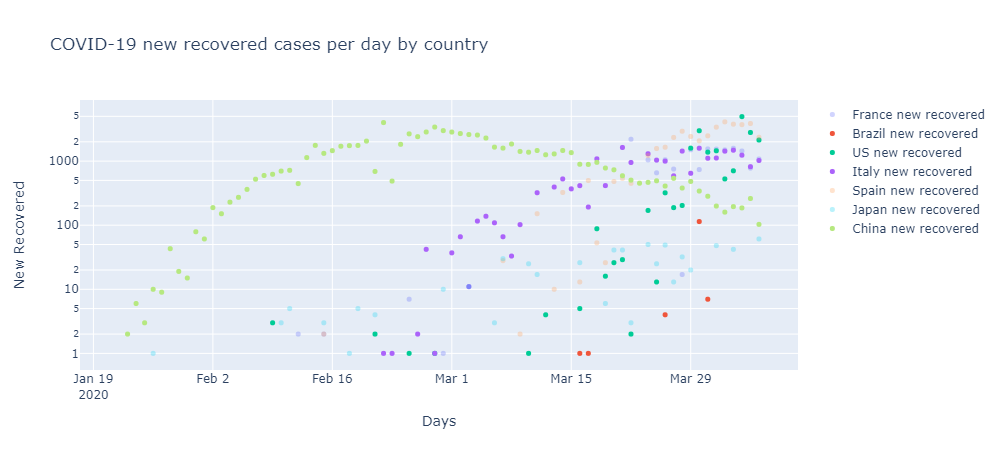

In [494]:
fig = go.Figure(series)
fig.update_layout(title_text='COVID-19 new recovered cases per day by country')
fig.update_xaxes(title_text='Days')
fig.update_yaxes(title_text='New Recovered', type='log')
#py.iplot(fig, file='covid-19.html', auto_open=False)
fig.show()

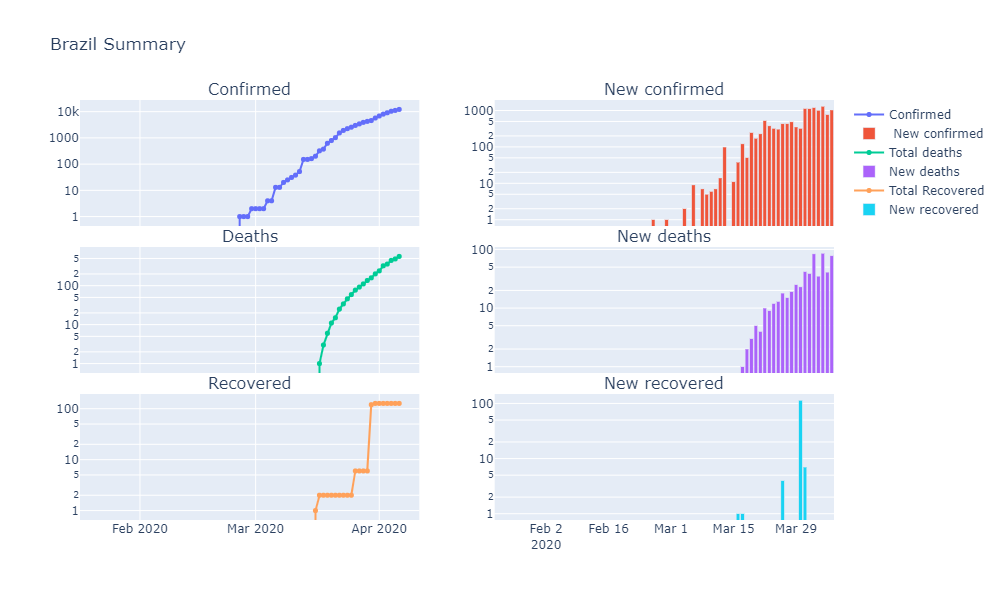

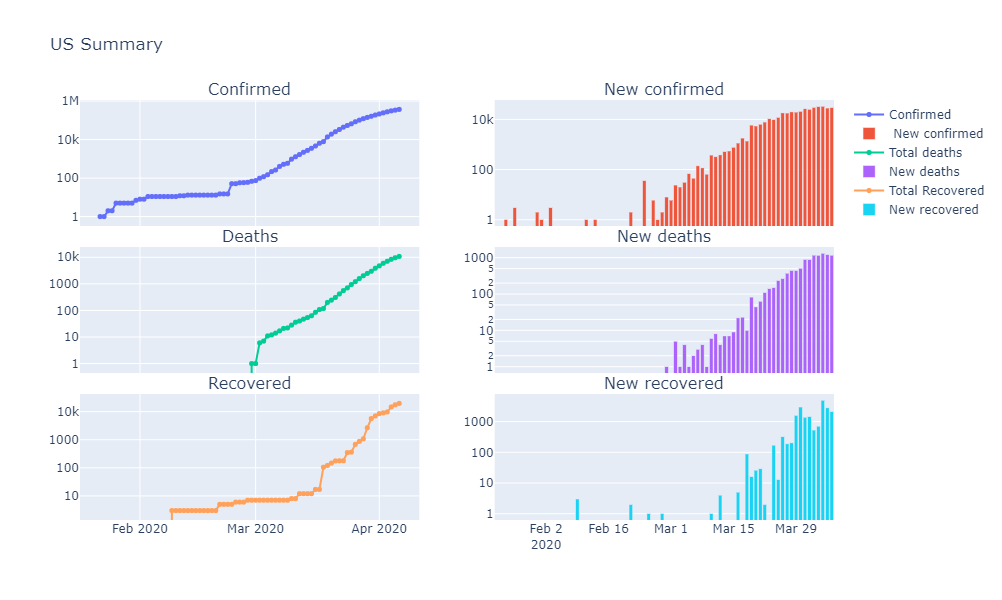

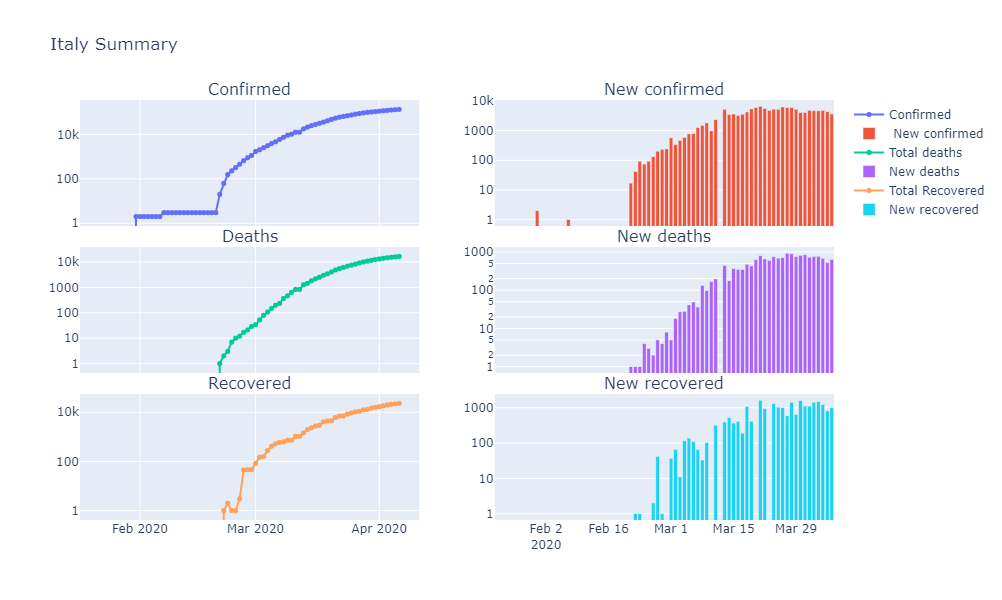

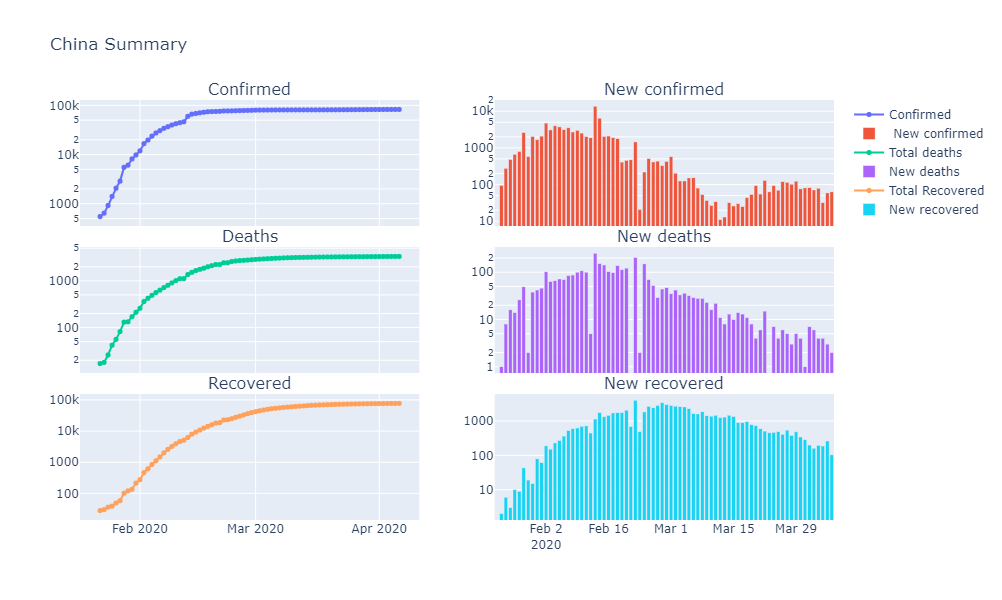

In [496]:
for country in highlightedCountries:
    focus=1
    figbr = make_subplots(
        rows=3, cols=2,
        shared_xaxes=True,
        vertical_spacing=0.05,
        specs=[[{"type": "scatter"},
               {"type": "scatter"}],
               [{"type": "scatter"},
               {"type": "scatter"}],
               [{"type": "scatter"},
               {"type": "scatter"}]],
        subplot_titles=("Confirmed", "New confirmed", 
                        "Deaths", "New deaths", 
                        "Recovered", "New recovered")
    )
    figbr.add_trace(
        go.Scatter(
            x=confirmedresultset[confirmedresultset.index == country].Date, 
            y=confirmedresultset[confirmedresultset.index == country].Confirmed, 
            name="Confirmed", 
            mode="markers+lines", opacity=focus,
            marker={"symbol":"circle", "size": 5},
            ),
        row=1, col=1
    )
    figbr.add_trace(
        go.Bar(
            x=confirmedresultset[confirmedresultset.index==country].Date, 
            y=confirmedresultset[confirmedresultset.index==country].DailyChange, 
            name=" New confirmed",   
        ),
        row=1, col=2    
    )    
    figbr.add_trace(
        go.Scatter(
            x=deathsresultset[deathsresultset.index == country].Date, 
            y=deathsresultset[deathsresultset.index == country].Deaths, 
            name="Total deaths",
            mode="markers+lines", opacity=focus,
            marker={"symbol":"circle", "size": 5},
        ),
        row=2, col=1   

    )    
    figbr.add_trace(
        go.Bar(
            x=deathsresultset[deathsresultset.index == country].Date, 
            y=deathsresultset[deathsresultset.index == country].DailyChange, 
            name="New deaths", 
            ),
        row=2, col=2  
    )
    figbr.add_trace(
    go.Scatter(
            x=recoveredresultset[recoveredresultset.index == country].Date, 
            y=recoveredresultset[recoveredresultset.index == country].Recovered, 
            name="Total Recovered",
            mode="markers+lines", opacity=focus,
            marker={"symbol":"circle", "size": 5},
            ), 
        row=3,col=1
    )
    figbr.add_trace(
        go.Bar(
            x=recoveredresultset[recoveredresultset.index == country].Date, 
            y=recoveredresultset[recoveredresultset.index == country].DailyChange, 
            name="New recovered", 
            ), 
        row=3,col=2
    )
    figbr.update_layout(
        height=600,
        showlegend=True,
        title_text=country+ " Summary",
    )
    figbr.update_yaxes(type='log')
    figbr.show()